In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc



In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
from sqlalchemy import create_engine, inspect

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [13]:
# Inspector prints columns for measurement
columns = [x['name'] for x in inspector.get_columns('measurement')]
columns

['id', 'station', 'date', 'prcp', 'tobs']

In [14]:
# Inspector prints columns for station
columns = [x['name'] for x in inspector.get_columns('station')]
columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [15]:
# Find the most recent date in the data set 
recent = session.query(Measurement).order_by(desc(Measurement.date)).first()
print(recent.date)

2017-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017, 8, 23)- dt.timedelta(days=356)
print(last_12_months)

2016-09-01


In [17]:
# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-09-01').\
    filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date).all()
query_results

[('2016-09-02', 0.0),
 ('2016-09-02', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-02', None),
 ('2016-09-02', None),
 ('2016-09-02', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 0.0),
 ('2016-09-03', 0.07),
 ('2016-09-03', 0.08),
 ('2016-09-03', 0.12),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.74),
 ('2016-09-04', 0.14),
 ('2016-09-04', 0.44),
 ('2016-09-05', None),
 ('2016-09-05', 0.11),
 ('2016-09-05', None),
 ('2016-09-05', 0.02),
 ('2016-09-05', 0.03),
 ('2016-09-05', 0.18),
 ('2016-09-06', None),
 ('2016-09-06', 0.05),
 ('2016-09-06', 0.04),
 ('2016-09-06', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-06', 1.0),
 ('2016-09-07', 0.05),
 ('2016-09-07', 0.1),
 ('2016-09-07', 0.23),
 ('2016-09-07', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.0),
 ('2016-09-08', 0.22),
 ('2016-09-08', 0.01),
 ('2016-09-08', None),
 ('2016-09-08', 0.01),
 ('2016-09-08', 0.07),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.03),
 ('2016-09-09', 0

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ["date", "prcp"] 
data_frame = pd.DataFrame(query_results, columns=column_names)
data_frame.head()

,date,prcp
0,2016-09-02,0.00
1,2016-09-02,0.02
2,2016-09-02,0.19
3,2016-09-02,NaN
4,2016-09-02,NaN


In [19]:
# Sort the dataframe by date
sorted_by_date = data_frame.sort_values(by='date')
sorted_by_date

,date,prcp
0,2016-09-02,0.00
1,2016-09-02,0.02
2,2016-09-02,0.19
3,2016-09-02,NaN
4,2016-09-02,NaN
...,...,...
2154,2017-08-21,0.00
2157,2017-08-21,0.56
2159,2017-08-22,0.00
2158,2017-08-22,0.00


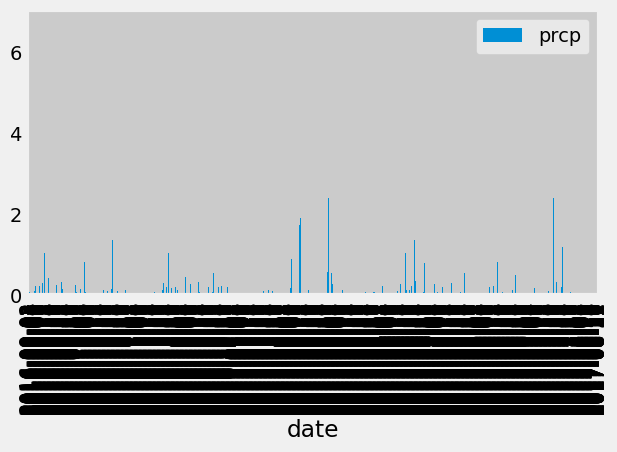

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
data_frame.set_index('date', inplace=True)
data_frame.plot.bar()
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_frame.describe()

,prcp
count,1959.000000
mean,0.171981
std,0.452695
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).distinct().count()
print(total_stations)

9


In [23]:
total_measurement_stations = session.query(Measurement.station).distinct().count()
print(total_measurement_stations)

9


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station,func.count(Measurement.station).label('observation_count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for row in station_counts:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ID ='USC00519281'
tobs_summary = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == ID).all()

for stats in tobs_summary:
    print(stats)
  


(54.0, 85.0, 71.66378066378067)


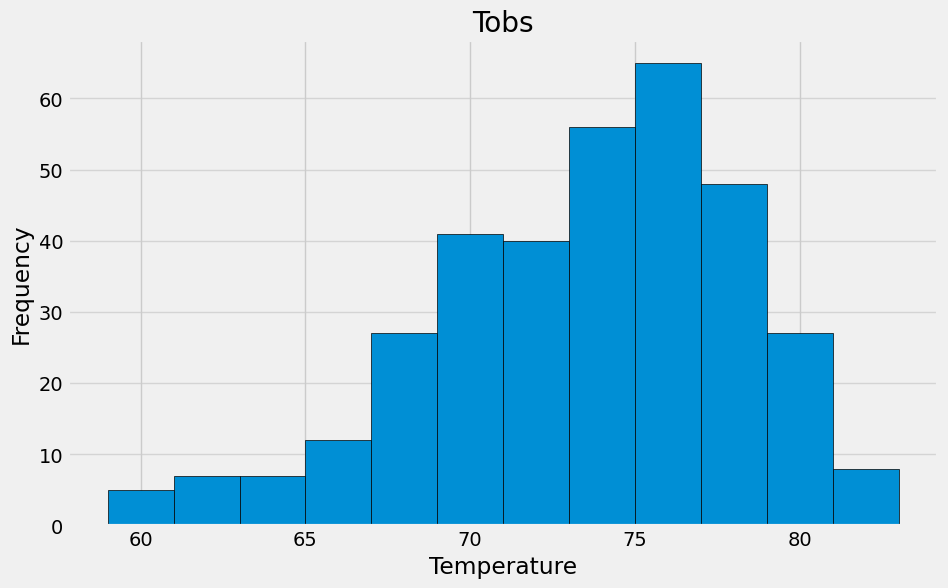

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ID ='USC00519281'

end_date = '2017-08-23'
start_date = '2016-09-01'

ID_last_year = session.query(Measurement.tobs).filter(
    Measurement.station == ID,
    Measurement.date >= start_date,
    Measurement.date <= end_date
).all()


most_active_station = pd.DataFrame(ID_last_year, columns=['temperature'])

plt.figure(figsize=(10, 6))
plt.hist(most_active_station['temperature'], bins=12, edgecolor='black')
plt.title('Tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()